<a href="https://colab.research.google.com/github/kivvgsr/-LGMVIP--DataScience/blob/main/LGMVIP_DataScience_01_(4_image_to_pencil).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Image to Pencil Sketch with Python:**

We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python. Reference:Watch Tutorial from here https://youtu.be/CBCfOTePVPo https://thecleverprogrammer.com/2020/09/30/pencil-sketch-with-python/

01

BEGINNER LEVEL TASK





In [21]:
import cv2
import matplotlib.pyplot as plt

## Let's load the image  with the help of cv2 library
we use the imread() method to read the image from the link
and cvtcolor() this method is mainly used tho convert the image from BGR to RGB


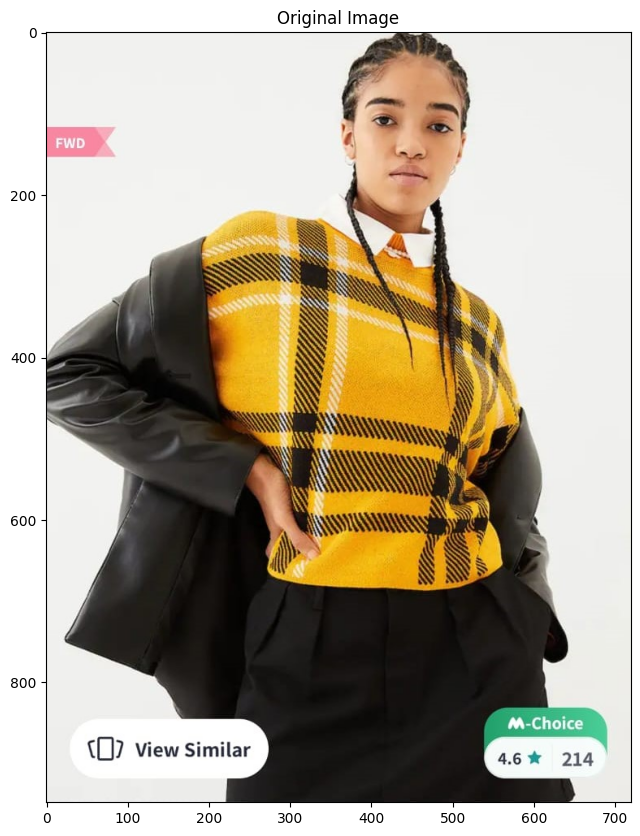

In [22]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# Corrected Google Drive link to the image
drive_link = "https://drive.google.com/uc?id=1rQ9O5lS5kQbZC3x8fF_H8QOqMC6hj3I3"

# Download the image from the link
img_path, _ = urllib.request.urlretrieve(drive_link, "image.jpg")

# Read the image using OpenCV
img = cv2.imread(img_path)

# Check if the image is successfully loaded
if img is not None:
    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title("Original Image")
    plt.show()
else:
    print("Failed to load the image.")


## LETS CONVERT THE IMAGE INTO THE GRAYSCALE :
this include decrese the complexity of the image

cv2.cvtColor: This function converts the color format of the image from BGR (commonly used by OpenCV) to RGB (commonly used for display in Matplotlib).

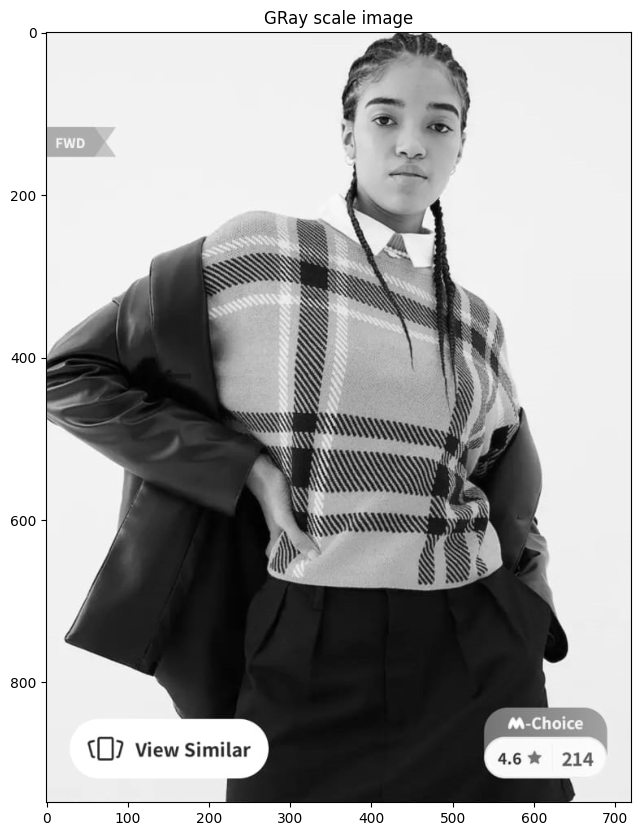

In [23]:
gray_img = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_img , cmap='gray')
plt.title('GRay scale image')
plt.show()

## BLURR the image :

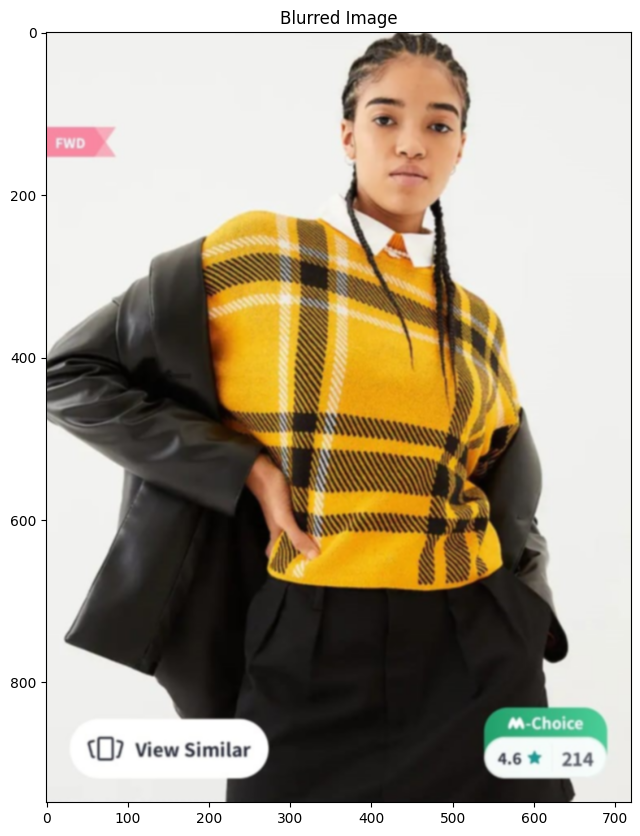

In [24]:
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.imshow(blurred_img)
plt.title('Blurred Image')
plt.show()


### this is mainly used for edge detection

---
for this we use canny method()



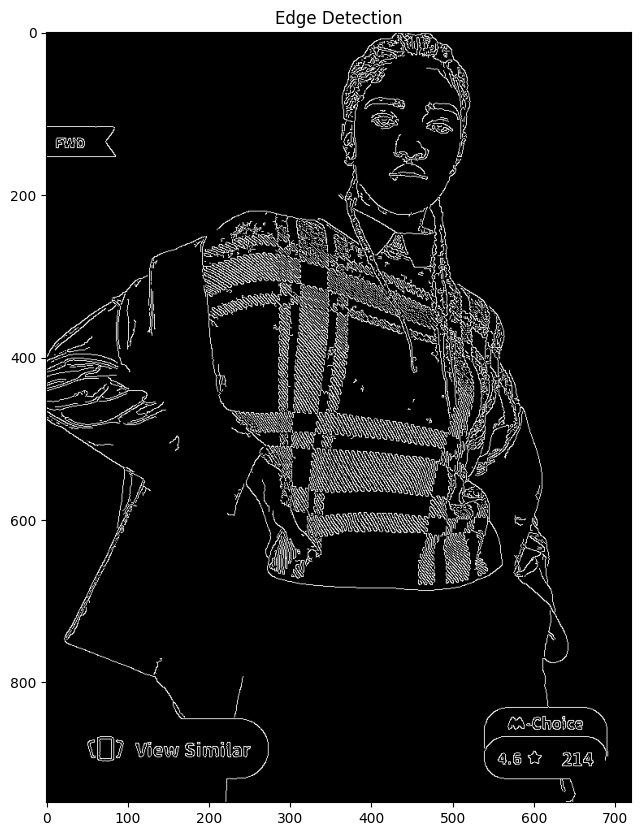

In [25]:
edges = cv2.Canny(gray_img, 50, 150)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()


## this is used for inverting color:
 for that we use the bitwise_not()method

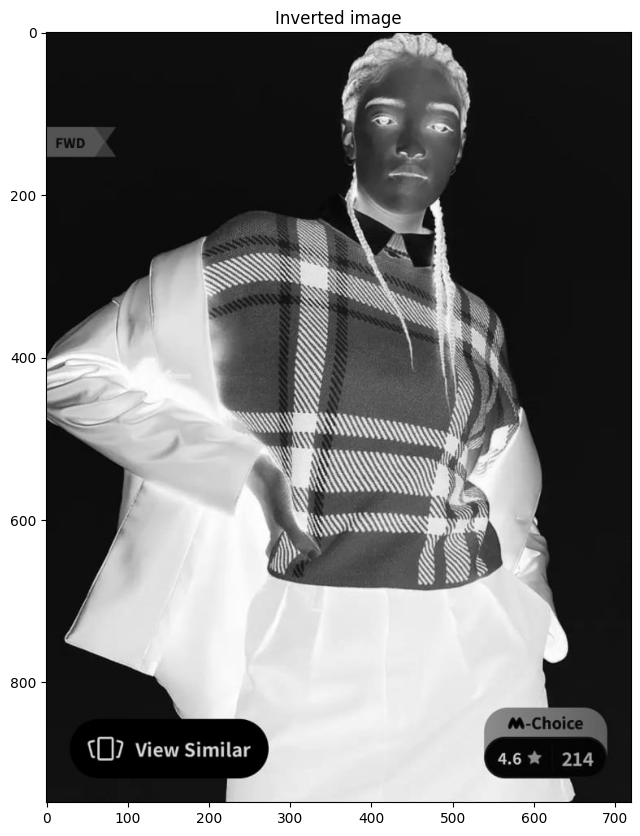

In [26]:
inverted_img = cv2.bitwise_not(gray_img)
plt.figure(figsize=(10, 10))
plt.imshow(inverted_img , cmap = 'gray')
plt.title('Inverted image')
plt.show()


### LETS smooth the image this helps to reduce the noise .

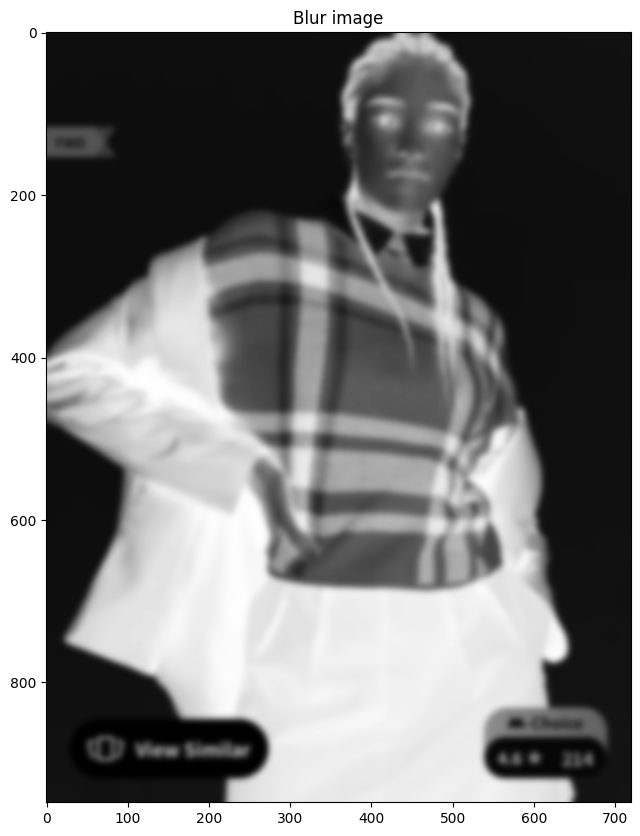

In [27]:
img_smooth = cv2.GaussianBlur(inverted_img,(23,23),sigmaX =0, sigmaY = 0 )
plt.figure(figsize = (10,10))
plt.imshow(img_smooth , cmap='gray')
plt.title('Blur image')
plt.show()

## FINALLY LETS SKETCH THE IMAGE :

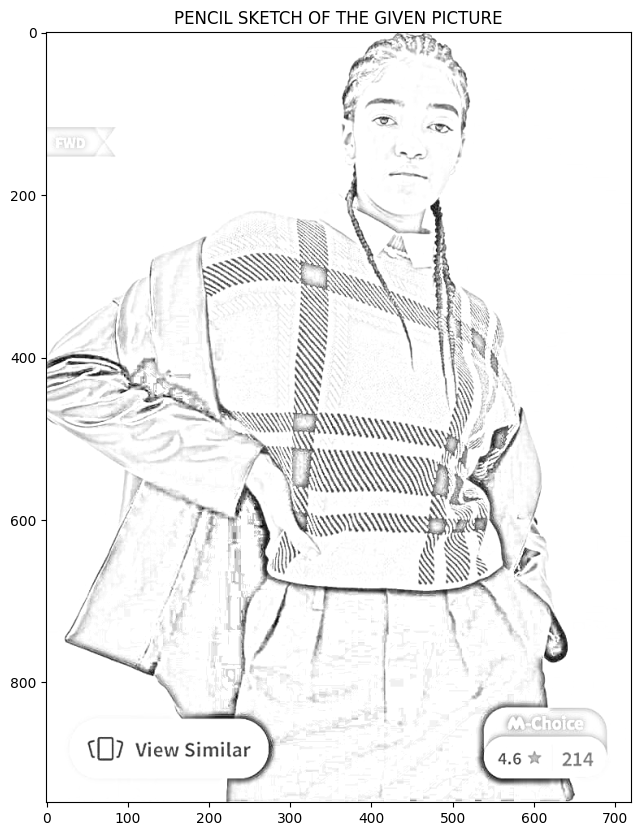

In [28]:
pencil_img = cv2.divide(gray_img , 255 -img_smooth , scale = 255 )
plt.figure(figsize = (10,10))
plt.imshow(pencil_img , cmap='gray')
plt.title('PENCIL SKETCH OF THE GIVEN PICTURE')
plt.show()
